# Install Transformers Library

In [ ]:
!pip install transformers

In [27]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
from transformers import AutoModel, BertTokenizerFast

# specify GPU
# device = torch.device("cuda")
device = torch.device("cpu")

# Load Dataset

In [2]:
from ipynb.fs.full.preprocess_generate_dataset import generate_dataframe

In [3]:
df = generate_dataframe(20)

In [ ]:
df = pd.read_csv("spamdata_v2.csv")
df.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df=df.rename(columns={'Post': 'text', 'code': 'label'})

In [69]:
df

,text,Label,label
0,viable option youll leaving wife behind youd p...,Supportive,4
1,hard appreciate notion could meet someone else...,Ideation,2
2,hi last night wa sitting ledge window contempl...,Behavior,1
3,tried kill self failed badly cause moment want...,Attempt,0
4,hi nem3030 sort thing enjoy personally always ...,Ideation,2
...,...,...,...
46,Eccrine hidrocystoma of skin Eccrine dermal d...,Indicator,3
73,Addicted to cannabis Cannabis addiction pain ...,Indicator,3
6,Infectious disease of central nervous system ...,Indicator,3
23,previously asexual.1 Adult gender identity di...,Indicator,3


In [5]:
# check class distribution
df['label'].value_counts(normalize = True)

2    0.316558
3    0.285714
4    0.175325
1    0.137987
0    0.084416
Name: label, dtype: float64

# Split train dataset into train, validation and test sets

In [70]:
train_text, temp_text, train_labels, temp_labels = train_test_split(df['text'], df['label'], 
                                                                    random_state=2018, 
                                                                    test_size=0.3, 
                                                                    stratify=df['label'])

# we will use temp_text and temp_labels to create validation and test set
val_text, test_text, val_labels, test_labels = train_test_split(temp_text, temp_labels, 
                                                                random_state=2018, 
                                                                test_size=0.5, 
                                                                stratify=temp_labels)

In [17]:
train_text

3      tried kill self failed badly cause moment want...
454    always something left even everything feel hop...
13     one question whatre interest specific please p...
2      hi last night wa sitting ledge window contempl...
43     seems fun someone would ive never cared travel...
                             ...                        
309    make anxiety mental depression bitch seriously...
89     look dont understand keep positive dont know l...
497    sound really weird maybe distractibility somet...
102    dont think sacrifice wouldnt right wrong under...
307    thank sharing proved another rough night wa da...
Name: text, Length: 431, dtype: object

In [71]:
from tensorflow.keras.utils import to_categorical

In [73]:
train_labels.values

array([0, 4, 2, 1, 0, 4, 2, 2, 4, 3, 1, 4, 1, 0, 1, 1, 3, 1, 3, 2, 4, 3,
       0, 3, 2, 3, 1, 1, 4, 3, 2, 1, 2, 2, 1, 3, 0, 3, 3, 3, 4, 4, 2, 3,
       2, 2, 2, 2, 3, 2, 2, 2, 1, 2, 0, 3, 2, 1, 4, 4, 1, 2, 3, 0, 3, 3,
       2, 2, 1, 4, 4, 2, 3, 2, 1, 1, 4, 2, 2, 1, 3, 3, 3, 2, 4, 4, 0, 0,
       3, 1, 2, 1, 3, 3, 4, 2, 4, 4, 0, 4, 4, 3, 2, 1, 3, 2, 3, 2, 2, 2,
       1, 2, 1, 3, 3, 2, 2, 3, 4, 4, 0, 2, 2, 4, 0, 3, 2, 2, 3, 2, 3, 2,
       3, 2, 4, 2, 1, 2, 3, 3, 3, 3, 1, 4, 3, 3, 4, 3, 3, 2, 1, 2, 0, 2,
       1, 4, 3, 4, 3, 1, 4, 3, 4, 2, 2, 4, 2, 3, 0, 2, 0, 4, 4, 4, 1, 0,
       3, 2, 2, 3, 4, 3, 3, 3, 4, 3, 2, 2, 1, 0, 3, 2, 2, 2, 2, 4, 3, 1,
       0, 4, 3, 3, 3, 3, 3, 4, 1, 1, 4, 1, 2, 3, 1, 0, 3, 3, 1, 1, 1, 3,
       3, 2, 3, 3, 2, 2, 2, 1, 1, 1, 0, 2, 0, 2, 4, 3, 2, 2, 0, 2, 4, 3,
       2, 4, 2, 2, 4, 0, 3, 2, 2, 3, 3, 4, 2, 4, 3, 2, 3, 2, 4, 2, 2, 3,
       1, 2, 0, 4, 2, 2, 2, 2, 2, 3, 1, 3, 1, 4, 4, 0, 2, 3, 3, 2, 3, 3,
       3, 4, 2, 2, 3, 4, 3, 2, 3, 4, 3, 0, 0, 3, 2,

In [74]:
y_train = to_categorical(train_labels.values)
y_test = to_categorical(test_labels.values)

In [ ]:
from transformers import AutoTokenizer,TFBertModel
tokenizer = AutoTokenizer.from_pretrained(‘bert-base-cased’)
bert = TFBertModel.from_pretrained(‘bert-base-cased’)

# Import BERT Model and BERT Tokenizer

In [9]:
from transformers import DistilBertTokenizer, TFDistilBertModel, DistilBertConfig


In [83]:
MODEL_NAME = 'bert-base-uncased'
# MODEL_NAME = 'distilbert-base-uncased'
# import BERT-base pretrained model
bert = AutoModel.from_pretrained(MODEL_NAME)

# Load the BERT tokenizer
tokenizer = BertTokenizerFast.from_pretrained(MODEL_NAME)

# tokenizer = DistilBertTokenizer.from_pretrained(MODEL_NAME) # Loading the tokenizer


FileNotFoundError: [Errno 2] No such file or directory: '/home/ifte-home/.cache/huggingface/hub/models--bert-base-uncased/refs/main'

In [52]:
# sample data
text = ["this is a bert model tutorial", "we will fine-tune a bert model"]

# encode text
sent_id = tokenizer.batch_encode_plus(text, padding=True, return_token_type_ids=False)

In [53]:
# output
print(sent_id)

{'input_ids': [[101, 2023, 2003, 1037, 14324, 2944, 14924, 4818, 102, 0], [101, 2057, 2097, 2986, 1011, 8694, 1037, 14324, 2944, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


# Tokenization

<AxesSubplot:>

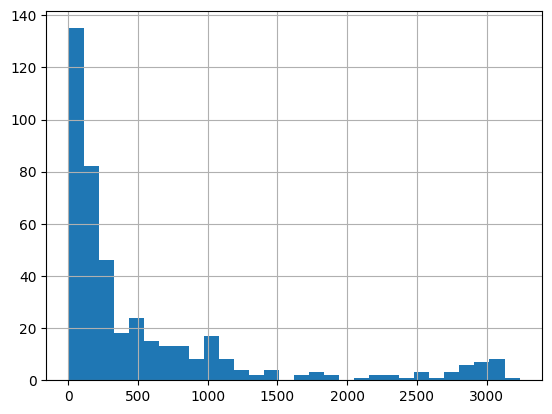

In [54]:
# get length of all the messages in the train set
seq_len = [len(i.split()) for i in train_text]

pd.Series(seq_len).hist(bins = 30)

In [55]:
max_seq_len = 25

In [56]:
# tokenize and encode sequences in the training set
tokens_train = tokenizer.batch_encode_plus(
    train_text.tolist(),
    max_length = max_seq_len,
    pad_to_max_length=True,
    truncation=True,
    return_token_type_ids=False
)

# tokenize and encode sequences in the validation set
tokens_val = tokenizer.batch_encode_plus(
    val_text.tolist(),
    max_length = max_seq_len,
    pad_to_max_length=True,
    truncation=True,
    return_token_type_ids=False
)

# tokenize and encode sequences in the test set
tokens_test = tokenizer.batch_encode_plus(
    test_text.tolist(),
    max_length = max_seq_len,
    pad_to_max_length=True,
    truncation=True,
    return_token_type_ids=False
)

/home/ifte-home/venvs/exp-Env/lib/python3.7/site-packages/transformers/tokenization_utils_base.py:2342: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


616

In [84]:
# Tokenize the input (takes some time) 
# here tokenizer using from bert-base-cased
x_train = tokenizer(
    text=df.head(len(df) - 30).text.tolist(),
    add_special_tokens=True,
    max_length=70,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)
x_test = tokenizer(
    text=df.tail(30).text.tolist(),
    add_special_tokens=True,
    max_length=70,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)

In [85]:
input_ids = x_train['input_ids']
attention_mask = x_train['attention_mask']

In [86]:
input_ids

<tf.Tensor: shape=(586, 70), dtype=int32, numpy=
array([[  101, 14874,  5724, ...,  2017,  3363,   102],
       [  101,  2524,  9120, ...,  3291,  2116,   102],
       [  101,  7632,  2197, ...,  2123,  2102,   102],
       ...,
       [  101,  5399, 26651, ...,  3345,  3162,   102],
       [  101,  7667,  2478, ...,  1015, 28322,   102],
       [  101,  1051, 10841, ..., 11265, 10976,   102]], dtype=int32)>

In [87]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Dense

In [88]:

max_len = 70
input_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_ids")
input_mask = Input(shape=(max_len,), dtype=tf.int32, name="attention_mask")
embeddings = bert(input_ids,attention_mask = input_mask)[0] 
out = tf.keras.layers.GlobalMaxPool1D()(embeddings)
out = Dense(128, activation='relu')(out)
out = tf.keras.layers.Dropout(0.1)(out)
out = Dense(32,activation = 'relu')(out)
y = Dense(6,activation = 'sigmoid')(out)
model = tf.keras.Model(inputs=[input_ids, input_mask], outputs=y)
model.layers[2].trainable = True

AttributeError: 'KerasTensor' object has no attribute 'size'

# Convert Integer Sequences to Tensors

In [57]:
# for train set
train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(train_labels.tolist())

# for validation set
val_seq = torch.tensor(tokens_val['input_ids'])
val_mask = torch.tensor(tokens_val['attention_mask'])
val_y = torch.tensor(val_labels.tolist())

# for test set
test_seq = torch.tensor(tokens_test['input_ids'])
test_mask = torch.tensor(tokens_test['attention_mask'])
test_y = torch.tensor(test_labels.tolist())

In [58]:
train_seq

tensor([[  101,  2699,  3102,  ...,  2507,  4608,   102],
        [  101,  2467,  2242,  ...,  2428,  3475,   102],
        [  101,  2028,  3160,  ..., 16103,  2135,   102],
        ...,
        [  101,  2614,  2428,  ..., 18355,  3266,   102],
        [  101,  2123,  2102,  ...,  2292,  2894,   102],
        [  101,  4067,  6631,  ...,  5248,  2215,   102]])

# Create DataLoaders

In [59]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

#define a batch size
batch_size = 32

# wrap tensors
train_data = TensorDataset(train_seq, train_mask, train_y)

# sampler for sampling the data during training
train_sampler = RandomSampler(train_data)

# dataLoader for train set
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# wrap tensors
val_data = TensorDataset(val_seq, val_mask, val_y)

# sampler for sampling the data during training
val_sampler = SequentialSampler(val_data)

# dataLoader for validation set
val_dataloader = DataLoader(val_data, sampler = val_sampler, batch_size=batch_size)

In [23]:
train_data.tensors

(tensor([[  101,  2699,  3102,  ...,  2507,  4608,   102],
         [  101,  2467,  2242,  ...,  2428,  3475,   102],
         [  101,  2028,  3160,  ..., 16103,  2135,   102],
         ...,
         [  101,  2614,  2428,  ..., 18355,  3266,   102],
         [  101,  2123,  2102,  ...,  2292,  2894,   102],
         [  101,  4067,  6631,  ...,  5248,  2215,   102]]),
 tensor([[1, 1, 1,  ..., 1, 1, 1],
         [1, 1, 1,  ..., 1, 1, 1],
         [1, 1, 1,  ..., 1, 1, 1],
         ...,
         [1, 1, 1,  ..., 1, 1, 1],
         [1, 1, 1,  ..., 1, 1, 1],
         [1, 1, 1,  ..., 1, 1, 1]]),
 tensor([0, 4, 2, 1, 0, 4, 2, 2, 4, 3, 1, 4, 1, 0, 1, 1, 3, 1, 3, 2, 4, 3, 0, 3,
         2, 3, 1, 1, 4, 3, 2, 1, 2, 2, 1, 3, 0, 3, 3, 3, 4, 4, 2, 3, 2, 2, 2, 2,
         3, 2, 2, 2, 1, 2, 0, 3, 2, 1, 4, 4, 1, 2, 3, 0, 3, 3, 2, 2, 1, 4, 4, 2,
         3, 2, 1, 1, 4, 2, 2, 1, 3, 3, 3, 2, 4, 4, 0, 0, 3, 1, 2, 1, 3, 3, 4, 2,
         4, 4, 0, 4, 4, 3, 2, 1, 3, 2, 3, 2, 2, 2, 1, 2, 1, 3, 3, 2, 2, 3, 4, 4,

# Freeze BERT Parameters

In [60]:
# freeze all the parameters
for param in bert.parameters():
    param.requires_grad = False

# Define Model Architecture

In [61]:
class BERT_Arch(nn.Module):

    def __init__(self, bert):
        super(BERT_Arch, self).__init__()
        self.bert = bert      
        # dropout layer
        self.dropout = nn.Dropout(0.1)
        # relu activation function
        self.relu =  nn.ReLU()
        # dense layer 1
        self.fc1 = nn.Linear(768,512)      
        # dense layer 2 (Output layer)
        self.fc2 = nn.Linear(512,2)
        #softmax activation function
        self.softmax = nn.LogSoftmax(dim=1)

    #define the forward pass
    def forward(self, sent_id, mask):
        #pass the inputs to the model  
        _, cls_hs = self.bert(sent_id, attention_mask=mask)
        x = self.fc1(cls_hs)
        x = self.relu(x)
        x = self.dropout(x)
        # output layer
        x = self.fc2(x)
        # apply softmax activation
        x = self.softmax(x)
        return x

In [62]:
# pass the pre-trained BERT to our define architecture
model = BERT_Arch(bert)

# push the model to GPU
model = model.to(device)

In [63]:
# optimizer from hugging face transformers
from transformers import AdamW

# define the optimizer
optimizer = AdamW(model.parameters(), lr = 1e-3)

# Find Class Weights

In [64]:
from sklearn.utils.class_weight import compute_class_weight

#compute the class weights
class_wts = compute_class_weight(class_weight='balanced', 
                                 classes=np.unique(train_labels), 
                                 y=train_labels)
# class_wts = dict(zip(np.unique(train_labels), class_wts))
print(class_wts)

[2.39444444 1.43666667 0.63382353 0.70081301 1.13421053]


In [65]:
# convert class weights to tensor
weights= torch.tensor(class_wts,dtype=torch.float)
weights = weights.to(device)

# loss function
cross_entropy  = nn.NLLLoss(weight=weights) 

# number of training epochs
epochs = 10

# Fine-Tune BERT

In [66]:
# function to train the model
def train():
  
  model.train()

  total_loss, total_accuracy = 0, 0
  
  # empty list to save model predictions
  total_preds=[]
  
  # iterate over batches
  for step,batch in enumerate(train_dataloader):
    
    # progress update after every 50 batches.
    if step % 50 == 0 and not step == 0:
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader)))

    # push the batch to gpu
    batch = [r.to(device) for r in batch]
 
    sent_id, mask, labels = batch

    # clear previously calculated gradients 
    model.zero_grad()        

    # get model predictions for the current batch
    preds = model(sent_id, mask)

    # compute the loss between actual and predicted values
    loss = cross_entropy(preds, labels)

    # add on to the total loss
    total_loss = total_loss + loss.item()

    # backward pass to calculate the gradients
    loss.backward()

    # clip the the gradients to 1.0. It helps in preventing the exploding gradient problem
    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

    # update parameters
    optimizer.step()

    # model predictions are stored on GPU. So, push it to CPU
    preds=preds.detach().cpu().numpy()

    # append the model predictions
    total_preds.append(preds)

  # compute the training loss of the epoch
  avg_loss = total_loss / len(train_dataloader)
  
  # predictions are in the form of (no. of batches, size of batch, no. of classes).
  # reshape the predictions in form of (number of samples, no. of classes)
  total_preds  = np.concatenate(total_preds, axis=0)

  #returns the loss and predictions
  return avg_loss, total_preds

In [67]:
# function for evaluating the model
def evaluate():
  
  print("\nEvaluating...")
  
  # deactivate dropout layers
  model.eval()

  total_loss, total_accuracy = 0, 0
  
  # empty list to save the model predictions
  total_preds = []

  # iterate over batches
  for step,batch in enumerate(val_dataloader):
    
    # Progress update every 50 batches.
    if step % 50 == 0 and not step == 0:
      
      # Calculate elapsed time in minutes.
      elapsed = format_time(time.time() - t0)
            
      # Report progress.
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(val_dataloader)))

    # push the batch to gpu
    batch = [t.to(device) for t in batch]

    sent_id, mask, labels = batch

    # deactivate autograd
    with torch.no_grad():
      
      # model predictions
      preds = model(sent_id, mask)

      # compute the validation loss between actual and predicted values
      loss = cross_entropy(preds,labels)

      total_loss = total_loss + loss.item()

      preds = preds.detach().cpu().numpy()

      total_preds.append(preds)

  # compute the validation loss of the epoch
  avg_loss = total_loss / len(val_dataloader) 

  # reshape the predictions in form of (number of samples, no. of classes)
  total_preds  = np.concatenate(total_preds, axis=0)

  return avg_loss, total_preds

# Start Model Training

In [68]:
# set initial loss to infinite
best_valid_loss = float('inf')

# empty lists to store training and validation loss of each epoch
train_losses=[]
valid_losses=[]

#for each epoch
for epoch in range(epochs):
     
    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))
    
    #train model
    train_loss, _ = train()
    
    #evaluate model
    valid_loss, _ = evaluate()
    
    #save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'saved_weights.pt')
    
    # append training and validation loss
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    
    print(f'\nTraining Loss: {train_loss:.3f}')
    print(f'Validation Loss: {valid_loss:.3f}')


 Epoch 1 / 10


ValueError: not enough values to unpack (expected 2, got 1)

# Load Saved Model

In [ ]:
#load weights of best model
path = 'saved_weights.pt'
model.load_state_dict(torch.load(path))

<All keys matched successfully>

# Get Predictions for Test Data

In [ ]:
# get predictions for test data
with torch.no_grad():
  preds = model(test_seq.to(device), test_mask.to(device))
  preds = preds.detach().cpu().numpy()

In [ ]:
# model's performance
preds = np.argmax(preds, axis = 1)
print(classification_report(test_y, preds))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       724
           1       0.88      0.92      0.90       112

    accuracy                           0.97       836
   macro avg       0.93      0.95      0.94       836
weighted avg       0.97      0.97      0.97       836



In [ ]:
# confusion matrix
pd.crosstab(test_y, preds)

col_0,0,1
row_0,,
0,710,14
1,9,103
